In [1]:
#1.Завантажити набір даних.
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data  # Ознаки
y = data.target  # Класи (0 - злоякісний, 1 - доброякісний)


In [2]:
#2.Розділити дані на тренувальний та тестовий набори.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
#3.Застосувати SVM і Random Forest для визначення важливих ознак.
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

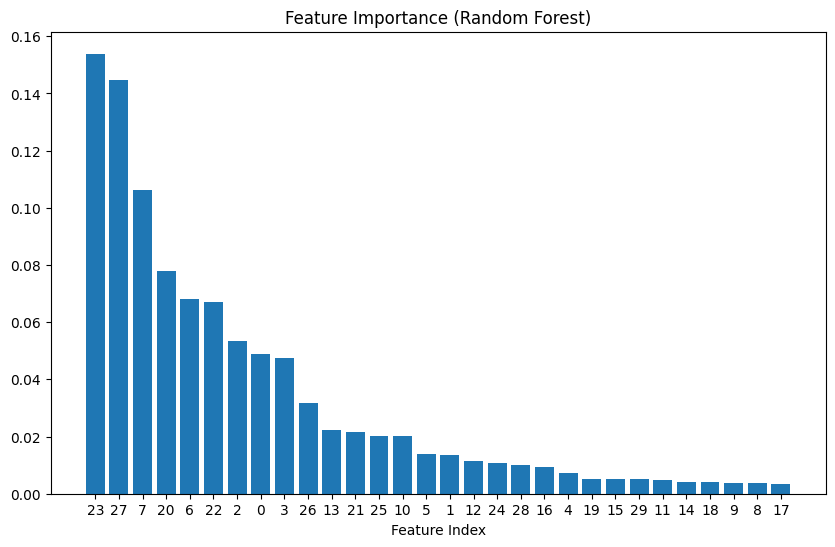

In [5]:
#4.Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі.
import numpy as np
import matplotlib.pyplot as plt

# Отримання важливості ознак з Random Forest
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Виведення графіка важливості ознак
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Feature Index")
plt.show()


5.Обговорити результати та визначити, які ознаки найбільше впливають на вихідні дані.
Площа (Area): Площа має найвищу важливість. Це може бути важливою ознакою для визначення класу, оскільки пухлини можуть мати великі розміри в разі злоякісних пухлин.

Периметр (Perimeter): Периметр також має значну важливість. Це пов'язано з розміром пухлини і може бути корисним показником для відрізнення злоякісних і доброякісних пухлин.

Радіус (Radius): Середній радіус також є важливою ознакою. Ця ознака також пов'язана з розміром пухлини.

Симетрія (Symmetry): Симетрія має помірну важливість. Це може вказувати на рівномірність форми пухлини.

Фрактальна вимірювана (Fractal Dimension): Фрактальна вимірювана є менш важливою ознакою в порівнянні з іншими. Ця ознака має менший вплив на класифікацію.

In [6]:
Обчислити точність для двох алгоритмів і порівняти результати
from sklearn.metrics import accuracy_score

# SVM
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Random Forest
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Точність SVM: {:.2f}%".format(svm_accuracy * 100))
print("Точність Random Forest: {:.2f}%".format(rf_accuracy * 100))


Точність SVM: 95.61%
Точність Random Forest: 96.49%
